# Import #


In [2]:
pip install -U kaleido

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 19.6 MB/s eta 0:00:00:00:0100:01
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install torch torchvision torchaudio torch-geometric python-louvain


Note: you may need to restart the kernel to use updated packages.


In [29]:
import torch
from torch_geometric.datasets import Planetoid

# Load the CiteSeer dataset
dataset = Planetoid(root='data', name='CiteSeer')

# Get the graph data
data = dataset[0]

# Print dataset information
print(f"Number of nodes: {data.num_nodes}")
print(f"Number of edges: {data.num_edges}")
print(f"Number of features per node: {data.num_node_features}")
print(f"Number of classes: {dataset.num_classes}")


Number of nodes: 3327
Number of edges: 9104
Number of features per node: 3703
Number of classes: 6


# Exploratory Data Analysis (EDA)

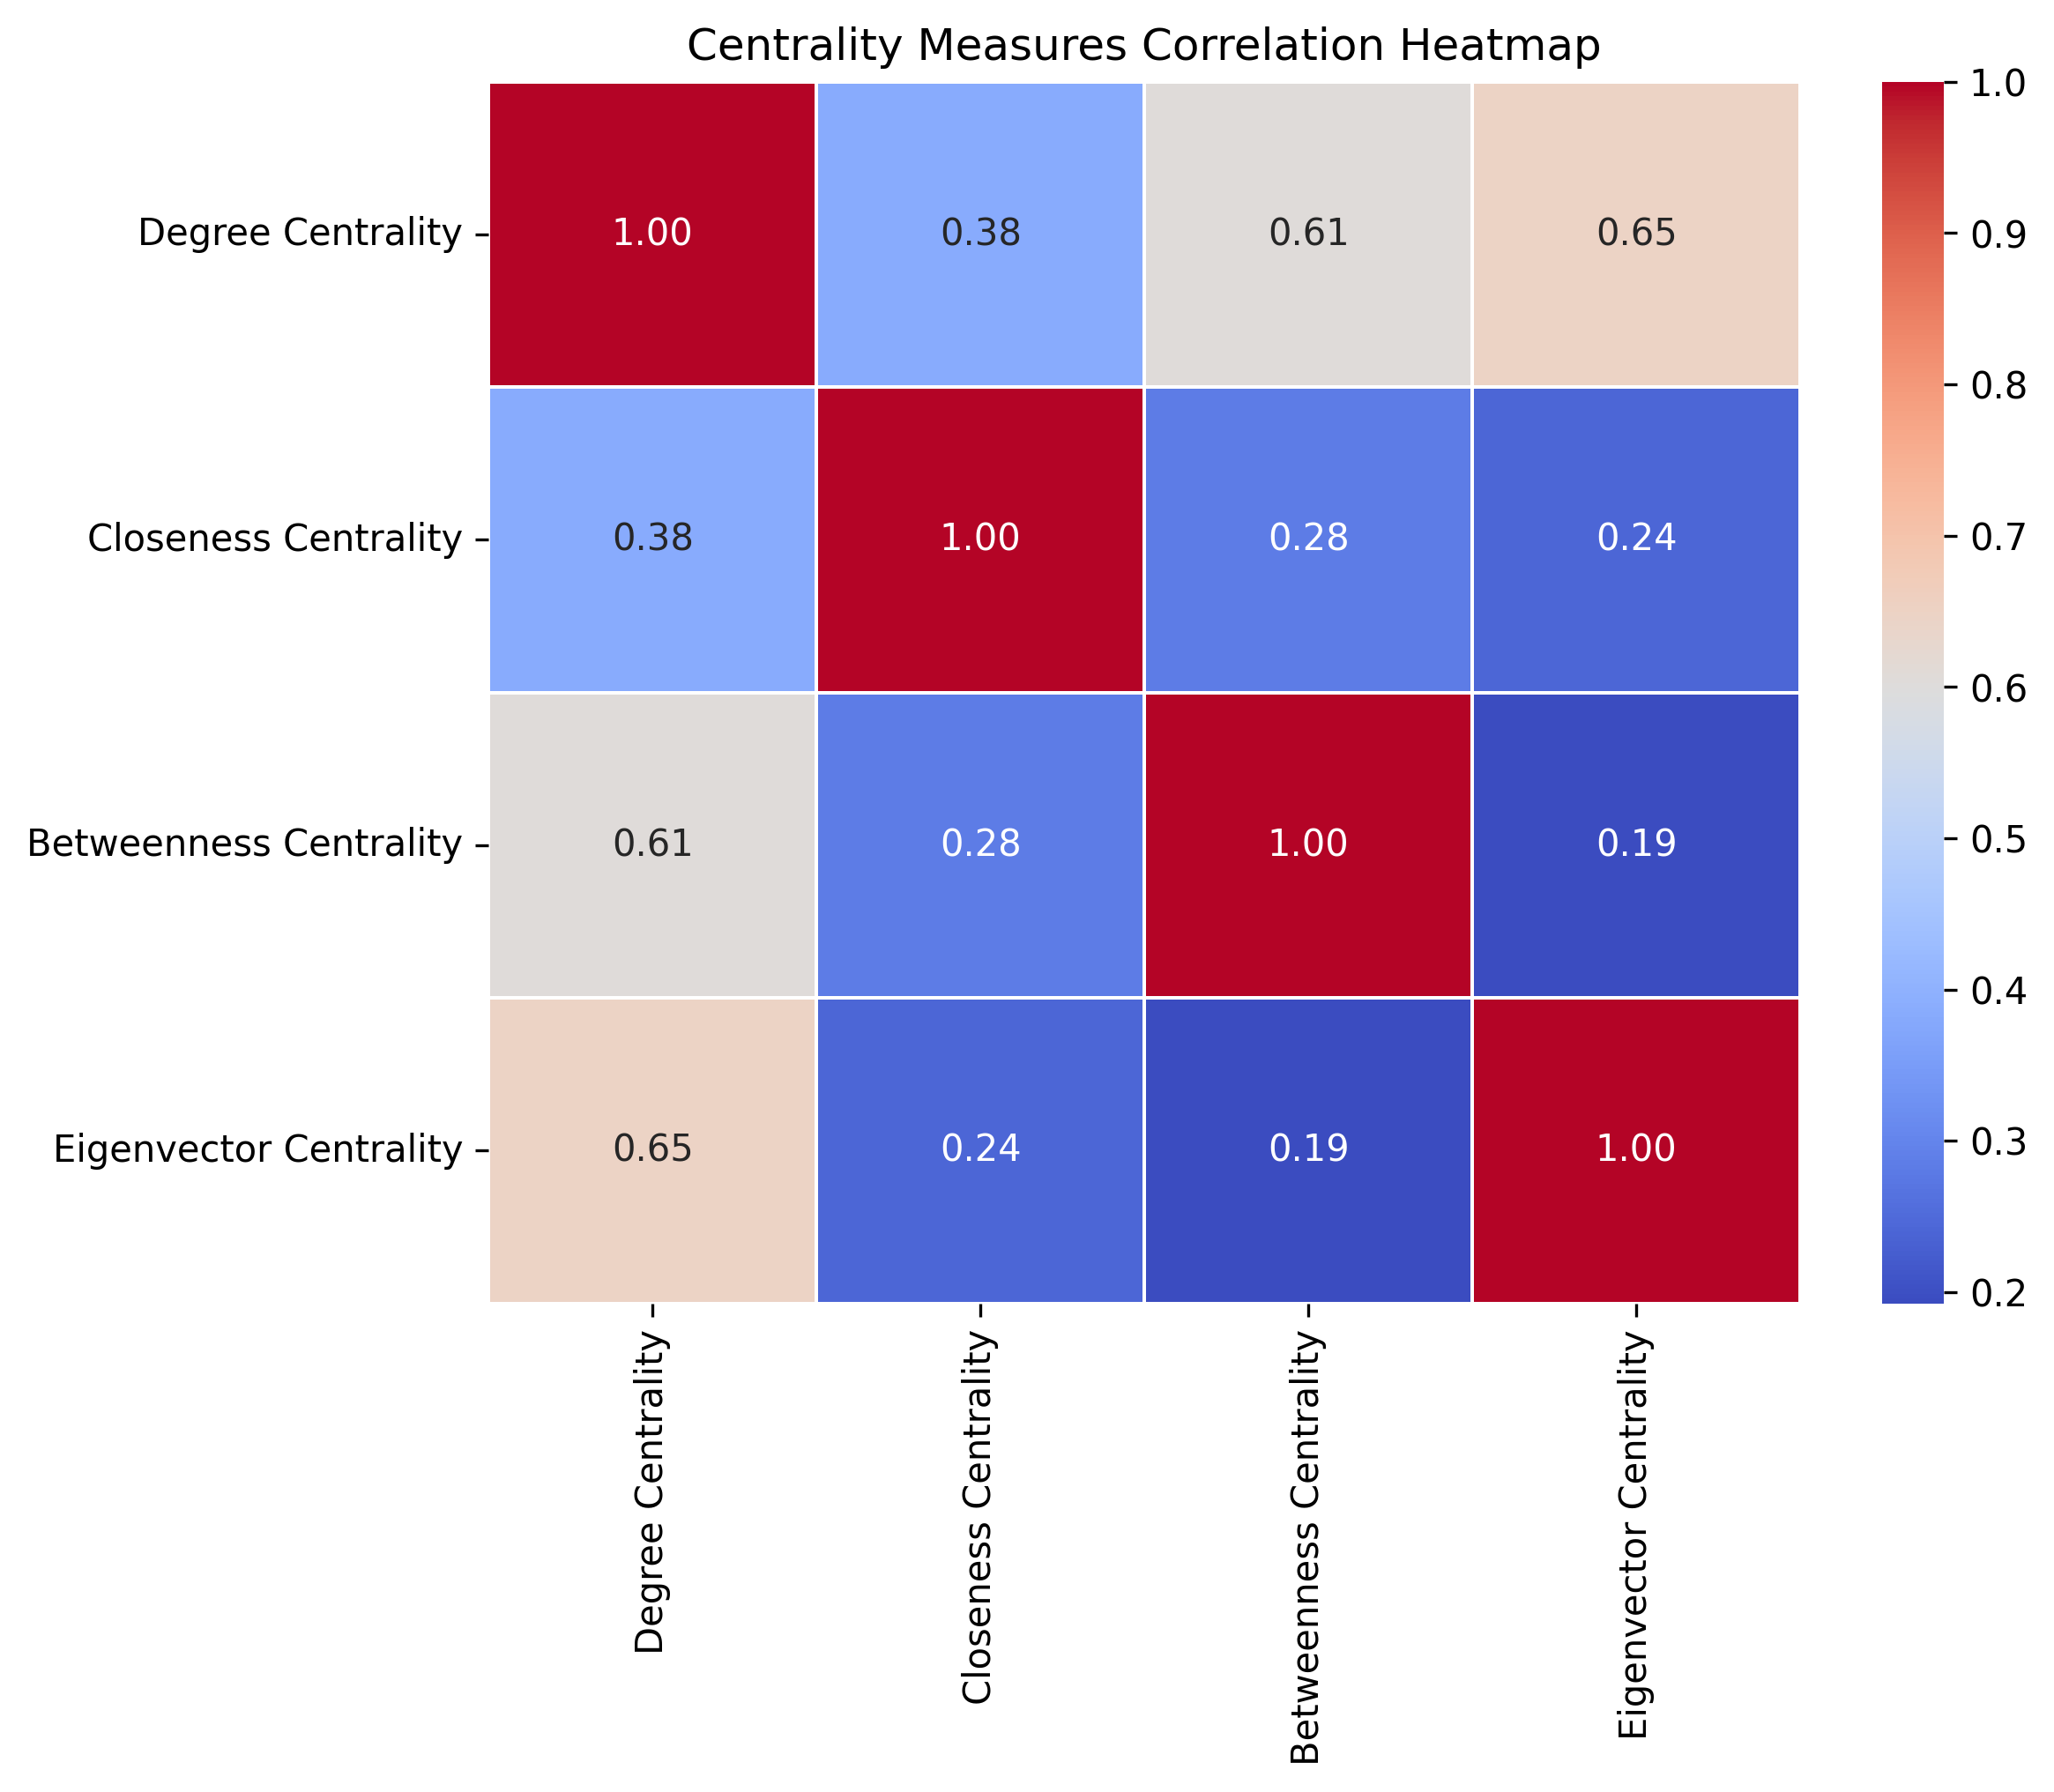

In [30]:
import torch
import networkx as nx
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from torch_geometric.utils import to_networkx
from torch_geometric.datasets import Planetoid

# Load the CiteSeer dataset
dataset = Planetoid(root='data', name='CiteSeer')
data = dataset[0]

# Convert PyG Data object to NetworkX graph
G = to_networkx(data, to_undirected=True)

# Compute various centralities
degree_centrality = nx.degree_centrality(G)
closeness_centrality = nx.closeness_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)
eigenvector_centrality = nx.eigenvector_centrality(G, max_iter=1000)

# Create a DataFrame for heatmap
centrality_df = pd.DataFrame({
    "Degree Centrality": degree_centrality,
    "Closeness Centrality": closeness_centrality,
    "Betweenness Centrality": betweenness_centrality,
    "Eigenvector Centrality": eigenvector_centrality
})

# Compute correlation matrix (4x4)
correlation_matrix = centrality_df.corr()

# Plot heatmap of correlations
plt.figure(figsize=(8, 6),dpi=300)
sns.heatmap(correlation_matrix, cmap="coolwarm", annot=True, fmt=".2f", linewidths=0.5)
plt.savefig("centrality_heatmap.png", dpi=300, bbox_inches='tight')

plt.title("Centrality Measures Correlation Heatmap")
plt.show()

In [31]:
import torch
import networkx as nx
import pandas as pd
import numpy as np
import plotly.express as px
from torch_geometric.utils import to_networkx
from torch_geometric.datasets import Planetoid

# Load the CiteSeer dataset
dataset = Planetoid(root='data', name='CiteSeer')
data = dataset[0]

# Convert PyG Data object to NetworkX graph
G = to_networkx(data, to_undirected=True)

# Compute various centralities
degree_centrality = nx.degree_centrality(G)
closeness_centrality = nx.closeness_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)
eigenvector_centrality = nx.eigenvector_centrality(G, max_iter=1000)

# Convert centrality dictionaries to lists (sorted by node index)
degree_centrality_values = [degree_centrality[i] for i in range(len(G))]
closeness_centrality_values = [closeness_centrality[i] for i in range(len(G))]
betweenness_centrality_values = [betweenness_centrality[i] for i in range(len(G))]
eigenvector_centrality_values = [eigenvector_centrality[i] for i in range(len(G))]

# 🔥 Extract actual class labels from the dataset
class_labels = data.y.numpy()

# 🔥 Define the actual class names for CiteSeer dataset
class_name_mapping = {
    0: "Agents",
    1: "AI",
    2: "DB",
    3: "IR",
    4: "ML",
    5: "HCI"
}

# 🔥 Apply the mapping to replace numbers with real class names
class_names = [class_name_mapping[label] for label in class_labels]

# Create a DataFrame for centralities with real class names
centrality_df = pd.DataFrame({
    "Class": class_names,
    "Degree Centrality": degree_centrality_values,
    "Closeness Centrality": closeness_centrality_values,
    "Betweenness Centrality": betweenness_centrality_values,
    "Eigenvector Centrality": eigenvector_centrality_values
})

# List of centralities to plot
centrality_measures = ["Degree Centrality", "Closeness Centrality", "Betweenness Centrality", "Eigenvector Centrality"]

# Save each plot separately
for centrality in centrality_measures:
    fig = px.box(centrality_df, x="Class", y=centrality, title=f"Distribution of {centrality} by Class",
                 color="Class", template="plotly_white")
    
    # Save each figure
    fig.write_image(f"{centrality.replace(' ', '_').lower()}_boxplot.png", scale=3)

print("All boxplots saved successfully!")

All boxplots saved successfully!


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



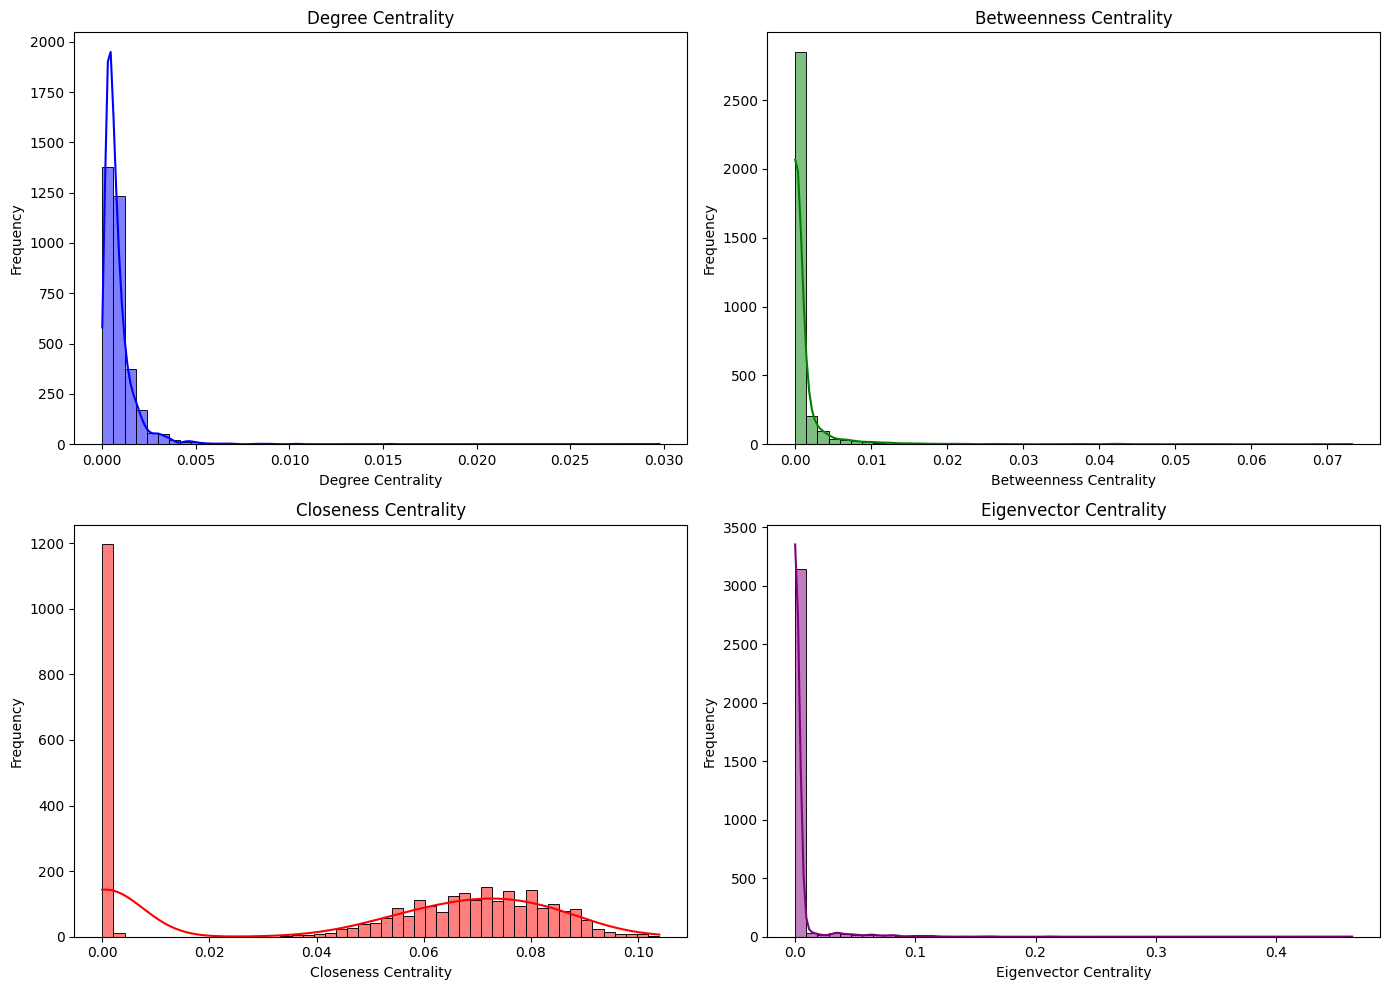

In [52]:
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns

# Compute metrics
degree_centrality = list(nx.degree_centrality(G).values())  # Compute degree centrality
betweenness = list(nx.betweenness_centrality(G).values())
closeness = list(nx.closeness_centrality(G).values())
eigenvector = list(nx.eigenvector_centrality(G, max_iter=1000).values())  # Compute eigenvector centrality

# Create subplots (2 rows, 2 columns)
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plot Degree Centrality
sns.histplot(degree_centrality, bins=50, kde=True, color="blue", ax=axes[0, 0])
axes[0, 0].set_title("Degree Centrality")
axes[0, 0].set_xlabel("Degree Centrality")
axes[0, 0].set_ylabel("Frequency")

# Plot Betweenness Centrality
sns.histplot(betweenness, bins=50, kde=True, color="green", ax=axes[0, 1])
axes[0, 1].set_title("Betweenness Centrality")
axes[0, 1].set_xlabel("Betweenness Centrality")
axes[0, 1].set_ylabel("Frequency")

# Plot Closeness Centrality
sns.histplot(closeness, bins=50, kde=True, color="red", ax=axes[1, 0])
axes[1, 0].set_title("Closeness Centrality")
axes[1, 0].set_xlabel("Closeness Centrality")
axes[1, 0].set_ylabel("Frequency")

# Plot Eigenvector Centrality
sns.histplot(eigenvector, bins=50, kde=True, color="purple", ax=axes[1, 1])
axes[1, 1].set_title("Eigenvector Centrality")
axes[1, 1].set_xlabel("Eigenvector Centrality")
axes[1, 1].set_ylabel("Frequency")

# Adjust layout
plt.tight_layout()

# Save the figure
plt.savefig("network_metrics_histogram.png", dpi=300)

# Show the plots
plt.show()


# Centralities #

In [32]:
import networkx as nx
from torch_geometric.utils import to_networkx
import plotly.graph_objects as go

# Convert PyTorch Geometric graph to NetworkX
G = to_networkx(data, to_undirected=True)

# Get node positions using a layout
pos = nx.spring_layout(G)

# Extract edge positions
edge_x = []
edge_y = []
for edge in G.edges():
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_x.extend([x0, x1, None])
    edge_y.extend([y0, y1, None])

# Extract node positions
node_x = [pos[node][0] for node in G.nodes()]
node_y = [pos[node][1] for node in G.nodes()]

# Create edges trace
edge_trace = go.Scatter(
    x=edge_x, y=edge_y,
    line=dict(width=0.5, color="gray"),
    hoverinfo="none",
    mode="lines"
)

# Create nodes trace
node_trace = go.Scatter(
    x=node_x, y=node_y,
    mode="markers",
    marker=dict(size=5, color="red"),
    hoverinfo="text"
)

# Create figure
fig = go.Figure(data=[edge_trace, node_trace])
fig.update_layout(showlegend=False, template="plotly_white", title="Graph Visualization",width=1300, height=900)

# Show figure
fig.show()


In [33]:
#import plotly.io as pio

# Save as a high-resolution PNG (scale acts like dpi)
#pio.write_image(fig, "basic_graph.png", scale=3)

# Degree Centrality

In [34]:
# Compute degree centrality
degree_centrality = nx.degree_centrality(G)

# Print top 5 nodes with highest degree centrality
top_nodes = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:5]
print("Top 5 nodes by degree centrality:")
for node, centrality in top_nodes:
    print(f"Node {node}: {centrality}")

# Print bottom 5 nodes with highest degree centrality
bottom_nodes = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=False)[:5]
print("Bottom 5 nodes by degree centrality:")
for node, centrality in bottom_nodes:
    print(f"Node {node}: {centrality}")

Top 5 nodes by degree centrality:
Node 1422: 0.029765484064942876
Node 582: 0.015333734215273603
Node 1214: 0.010523150932050512
Node 2782: 0.010222489476849068
Node 1943: 0.009019843656043296
Bottom 5 nodes by degree centrality:
Node 192: 0.0
Node 223: 0.0
Node 276: 0.0
Node 358: 0.0
Node 546: 0.0


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# Compute degree centrality
degree_centrality = nx.degree_centrality(G)

# Sort nodes by centrality (low to high)
sorted_nodes = sorted(degree_centrality, key=degree_centrality.get)

# Get centrality values
centrality_values = np.array([degree_centrality[n] for n in sorted_nodes])

# Apply logarithmic scaling for better color contrast
centrality_values = np.log1p(centrality_values)  # log(1 + x) to handle zero values

# Normalize with better scaling
norm = plt.Normalize(vmin=np.percentile(centrality_values, 5), vmax=np.percentile(centrality_values, 95))

# Choose a high-contrast colormap
cmap = plt.cm.plasma  # Alternative: 'coolwarm', 'inferno'
node_colors = [cmap(norm(v)) for v in centrality_values]

# Get positions with increased spacing
pos = nx.spring_layout(G, seed=42, k=0.2)  # Adjust `k` for spreading nodes apart

# Draw graph
plt.figure(figsize=(15, 10))  # Increased figure size
nx.draw_networkx_nodes(G, pos, nodelist=sorted_nodes, node_color=node_colors, cmap=cmap, edgecolors="black", node_size=30)
nx.draw_networkx_edges(G, pos, alpha=0.4, width=0.3)  # Thinner, more transparent edges

# Add colorbar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
plt.colorbar(sm, label="Degree Centrality (Log-Scaled)")

plt.title("Degree Centrality - CiteSeer Graph", fontsize=14)
plt.axis("off")  # Hide axes for better clarity
plt.show()


In [54]:
import networkx as nx
import numpy as np
import plotly.graph_objects as go


degree_centrality = nx.degree_centrality(G)
sorted_nodes = sorted(degree_centrality, key=degree_centrality.get)
centrality_values = np.array([degree_centrality[n] for n in sorted_nodes])
centrality_values = np.log1p(centrality_values)  
min_c, max_c = np.percentile(centrality_values, 5), np.percentile(centrality_values, 95)
centrality_norm = (centrality_values - min_c) / (max_c - min_c)
colorscale = "Plasma"
pos = nx.spring_layout(G, seed=42, k=0.2)  
node_x, node_y = [], []
for node in sorted_nodes:
    x, y = pos[node]
    node_x.append(x)
    node_y.append(y)
edge_x, edge_y = [], []
for edge in G.edges():
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_x.extend([x0, x1, None])  
    edge_y.extend([y0, y1, None])
edge_trace = go.Scatter(x=edge_x, y=edge_y,line=dict(width=0.5, color="rgba(0, 0, 0, 0.5)"), 
    hoverinfo="none",mode="lines")
node_trace = go.Scatter(x=node_x, y=node_y,mode="markers",marker=dict(size=10,color=centrality_norm, 
        colorscale=colorscale,showscale=True,colorbar=dict(title="Degree Centrality (Log-Scaled)"),
        line=dict(color='black', width=1)),text=[f"Node {n}<br>Centrality: {degree_centrality[n]:.4f}" for n in sorted_nodes],
    hoverinfo="text")
fig = go.Figure(data=[edge_trace, node_trace])
fig.update_layout(
    title="Degree Centrality - CiteSeer Graph",showlegend=False,width=1300, height=900,
    xaxis=dict(showgrid=False, zeroline=False, visible=False),
    yaxis=dict(showgrid=False, zeroline=False, visible=False))
fig.show()

In [56]:
#import plotly.io as pio

# Save as a high-resolution PNG (scale acts like dpi)
#pio.write_image(fig, "degree_centrality.png", scale=3)

# Closeness Centrality

In [38]:
import torch
import networkx as nx
import plotly.graph_objects as go
from torch_geometric.utils import to_networkx
from torch_geometric.datasets import Planetoid
import numpy as np

dataset = Planetoid(root='data', name='CiteSeer')
data = dataset[0]
G = to_networkx(data, to_undirected=True)
closeness_centrality = nx.closeness_centrality(G)
node_color = np.array(list(closeness_centrality.values())) 
pos = nx.spring_layout(G, seed=42, k=0.1)  
edge_x = []
edge_y = []
for edge in G.edges():
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_x.append(x0)
    edge_x.append(x1)
    edge_x.append(None)  
    edge_y.append(y0)
    edge_y.append(y1)
    edge_y.append(None)

edge_trace = go.Scatter(x=edge_x, y=edge_y,line=dict(width=0.5, color="gray"),hoverinfo="none",mode="lines")

node_x = []
node_y = []
for node in G.nodes():
    x, y = pos[node]
    node_x.append(x)
    node_y.append(y)

node_trace = go.Scatter(x=node_x, y=node_y,mode="markers",marker=dict(showscale=True,colorscale="Viridis",size=8,color=node_color, 
        colorbar=dict(title="Closeness Centrality"),line=dict(width=0.8, color="black")),opacity=0.9,
    text=[f"Node {i}<br>Closeness: {closeness_centrality[i]:.4f}" for i in G.nodes()],hoverinfo="text")
fig = go.Figure(data=[edge_trace, node_trace])
fig.update_layout(title="CiteSeer Graph - Closeness Centrality",titlefont_size=16,showlegend=False,width=1300, height=900,hovermode="closest",
    margin=dict(b=10, l=10, r=10, t=50),xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),yaxis=dict(showgrid=False, zeroline=False, showticklabels=False))
fig.show()

In [39]:
#import plotly.io as pio

# Save as a high-resolution PNG (scale acts like dpi)
#pio.write_image(fig, "closeness_centrality.png", scale=3)

# Betweenness Centrality

In [40]:
import networkx as nx
import numpy as np
import plotly.graph_objects as go

betweenness_centrality = nx.betweenness_centrality(G)
sorted_nodes = sorted(betweenness_centrality, key=betweenness_centrality.get)
centrality_values = np.array([betweenness_centrality[n] for n in sorted_nodes])
centrality_values = np.log1p(centrality_values) 
min_c, max_c = np.percentile(centrality_values, 5), np.percentile(centrality_values, 95)
centrality_norm = (centrality_values - min_c) / (max_c - min_c)
colorscale = "RdBu"
pos = nx.spring_layout(G, seed=42, k=0.2) 
node_x, node_y = [], []
for node in sorted_nodes:
    x, y = pos[node]
    node_x.append(x)
    node_y.append(y)
edge_x, edge_y = [], []
for edge in G.edges():
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_x.extend([x0, x1, None])  
    edge_y.extend([y0, y1, None])
edge_trace = go.Scatter(x=edge_x, y=edge_y,line=dict(width=0.5, color="rgba(0, 0, 0, 0.5)"),hoverinfo="none",mode="lines")
node_trace = go.Scatter(x=node_x, y=node_y,mode="markers",marker=dict(size=8,color=centrality_norm,colorscale=colorscale,showscale=True,
        colorbar=dict(title="Betweenness Centrality (Log-Scaled)"),line=dict(color='black', width=0.9)),opacity=0.9,
    text=[f"Node {n}<br>Centrality: {betweenness_centrality[n]:.4f}" for n in sorted_nodes],hoverinfo="text")
fig = go.Figure(data=[edge_trace, node_trace])
fig.update_layout(title="Betweenness Centrality - CiteSeer Graph",showlegend=False,width=1300, height=900,
    xaxis=dict(showgrid=False, zeroline=False, visible=False),yaxis=dict(showgrid=False, zeroline=False, visible=False))
fig.show()


In [41]:
#import plotly.io as pio

# Save as a high-resolution PNG (scale acts like dpi)
#pio.write_image(fig, "betweenness_centrality.png", scale=3)

# Eigenvector Centrality

In [42]:
import torch
import networkx as nx
import plotly.graph_objects as go
from torch_geometric.utils import to_networkx
from torch_geometric.datasets import Planetoid
import numpy as np
dataset = Planetoid(root='data', name='CiteSeer')
data = dataset[0]
G = to_networkx(data, to_undirected=True)
eigenvector_centrality = nx.eigenvector_centrality(G, max_iter=1000, tol=1e-6)
node_color = np.array(list(eigenvector_centrality.values()))  
pos = nx.spring_layout(G, seed=42, k=0.1) 
edge_x = []
edge_y = []
for edge in G.edges():
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_x.append(x0)
    edge_x.append(x1)
    edge_x.append(None)  
    edge_y.append(y0)
    edge_y.append(y1)
    edge_y.append(None)
edge_trace = go.Scatter(x=edge_x, y=edge_y,line=dict(width=0.5, color="gray"),hoverinfo="none",mode="lines")
node_x = []
node_y = []
for node in G.nodes():
    x, y = pos[node]
    node_x.append(x)
    node_y.append(y)
node_trace = go.Scatter(x=node_x, y=node_y,mode="markers",marker=dict(showscale=True,colorscale="Rainbow",size=8,color=node_color,
        colorbar=dict(title="Eigenvector Centrality"),line=dict(width=0.8, color="black")),opacity=0.9,
    text=[f"Node {i}<br>Eigenvector: {eigenvector_centrality[i]:.4f}" for i in G.nodes()],hoverinfo="text")
fig = go.Figure(data=[edge_trace, node_trace])
fig.update_layout(title="CiteSeer Graph - Eigenvector Centrality",titlefont_size=16,showlegend=False,width=1300, height=900,hovermode="closest",margin=dict(b=10, l=10, r=10, t=50),
    xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),yaxis=dict(showgrid=False, zeroline=False, showticklabels=False))
fig.show()

In [43]:
#import plotly.io as pio

# Save as a high-resolution PNG (scale acts like dpi)
#pio.write_image(fig, "Eigenvector Centrality.png", scale=3)

# Clustering

# Community 

In [44]:
import networkx as nx
import plotly.graph_objects as go
import community  # python-louvain
from torch_geometric.datasets import Planetoid
from torch_geometric.utils import to_networkx

# Load CiteSeer dataset
dataset = Planetoid(root='data/CiteSeer', name='CiteSeer')
data = dataset[0]

# Convert PyTorch Geometric graph to NetworkX
G = to_networkx(data, to_undirected=True)

# Detect communities using Louvain algorithm
partition = community.best_partition(G)

# Assign unique colors to each community
unique_communities = list(set(partition.values()))
color_map = {comm: f"rgba({i*30 % 255},{i*60 % 255},{i*90 % 255},0.8)" for i, comm in enumerate(unique_communities)}
node_colors = [color_map[partition[n]] for n in G.nodes()]

# Get node positions using Kamada-Kawai layout
pos = nx.kamada_kawai_layout(G, scale=10)

# Extract edge coordinates
edge_x, edge_y = [], []
for edge in G.edges():
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_x.extend([x0, x1, None])
    edge_y.extend([y0, y1, None])

# Create edge trace
edge_trace = go.Scatter(
    x=edge_x, y=edge_y,
    line=dict(width=0.5, color='gray'),
    hoverinfo='none',
    mode='lines'
)

# Create node trace
node_x, node_y = zip(*[pos[n] for n in G.nodes()])
node_trace = go.Scatter(
    x=node_x, y=node_y,
    mode='markers',
    marker=dict(size=6, color=node_colors, line=dict(width=0.5, color="black")),
    text=[f"Node {n}, Community {partition[n]}" for n in G.nodes()],
    hoverinfo='text'
)

# Create Plotly figure
fig = go.Figure(data=[edge_trace, node_trace])
fig.update_layout(
    title="Louvain Community Detection on CiteSeer",
    showlegend=False,
    hovermode='closest',
    margin=dict(b=0, l=0, r=0, t=40),
    xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
    yaxis=dict(showgrid=False, zeroline=False, showticklabels=False),width=1300, height=900,
)

fig.show()


In [45]:
#import plotly.io as pio

# Save as a high-resolution PNG (scale acts like dpi)
#pio.write_image(fig, "Louvain_Community_Detection.png", scale=3)

In [46]:
import torch
import networkx as nx
import plotly.graph_objects as go
from torch_geometric.datasets import Planetoid
from torch_geometric.utils import to_networkx

# Load CiteSeer dataset
dataset = Planetoid(root='data/CiteSeer', name='CiteSeer')
data = dataset[0]

# Convert PyTorch Geometric graph to NetworkX
G = to_networkx(data, to_undirected=True)

# Apply Kernighan-Lin community detection
partition = nx.community.kernighan_lin_bisection(G)

# Assign colors based on partition
node_colors = ['red' if node in partition[0] else 'blue' for node in G.nodes()]

# Get node positions using Kamada-Kawai layout
pos = nx.kamada_kawai_layout(G, scale=10)

# Extract edge coordinates
edge_x, edge_y = [], []
for edge in G.edges():
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_x.extend([x0, x1, None])
    edge_y.extend([y0, y1, None])

# Create edge trace
edge_trace = go.Scatter(
    x=edge_x, y=edge_y,
    line=dict(width=0.5, color='black'),
    hoverinfo='none',
    mode='lines'
)

# Create node trace
node_x, node_y = zip(*[pos[n] for n in G.nodes()])
node_trace = go.Scatter(
    x=node_x, y=node_y,
    mode='markers',
    marker=dict(size=6, color=node_colors,line=dict(width=0.5, color="black")),
    text=[f"Node {n}" for n in G.nodes()],
    hoverinfo='text'
)

# Create Plotly figure
fig = go.Figure(data=[edge_trace, node_trace])
fig.update_layout(
    title="Kernighan-Lin Community Detection on CiteSeer",
    showlegend=False,
    hovermode='closest',
    margin=dict(b=0, l=0, r=0, t=40),
    xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
    yaxis=dict(showgrid=False, zeroline=False, showticklabels=False),width=1300, height=900,
)

fig.show()


In [47]:
#import plotly.io as pio

# Save as a high-resolution PNG (scale acts like dpi)
#pio.write_image(fig, "Kernighan_Lin_Community_Detection.png", scale=3)

# Model 

In [10]:
import torch
import torch.nn.functional as F
from torch_geometric.nn import GCNConv
from torch_geometric.datasets import Planetoid
dataset = Planetoid(root='data', name='CiteSeer')
data = dataset[0]
class GCN(torch.nn.Module):
    def __init__(self):
        super(GCN, self).__init__()
        self.conv1 = GCNConv(dataset.num_features, 16)
        self.conv2 = GCNConv(16, dataset.num_classes)
    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = self.conv2(x, edge_index)
        return F.log_softmax(x, dim=1)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = GCN().to(device)
data = data.to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4)
for epoch in range(200):
    model.train()
    optimizer.zero_grad()
    out = model(data)
    loss = F.nll_loss(out[data.train_mask], data.y[data.train_mask])
    loss.backward()
    optimizer.step()
model.eval()
pred = model(data).argmax(dim=1)
correct = (pred[data.test_mask] == data.y[data.test_mask]).sum()
acc = int(correct) / int(data.test_mask.sum())
print(f"Test Accuracy: {acc:.4f}")

Test Accuracy: 0.6810


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


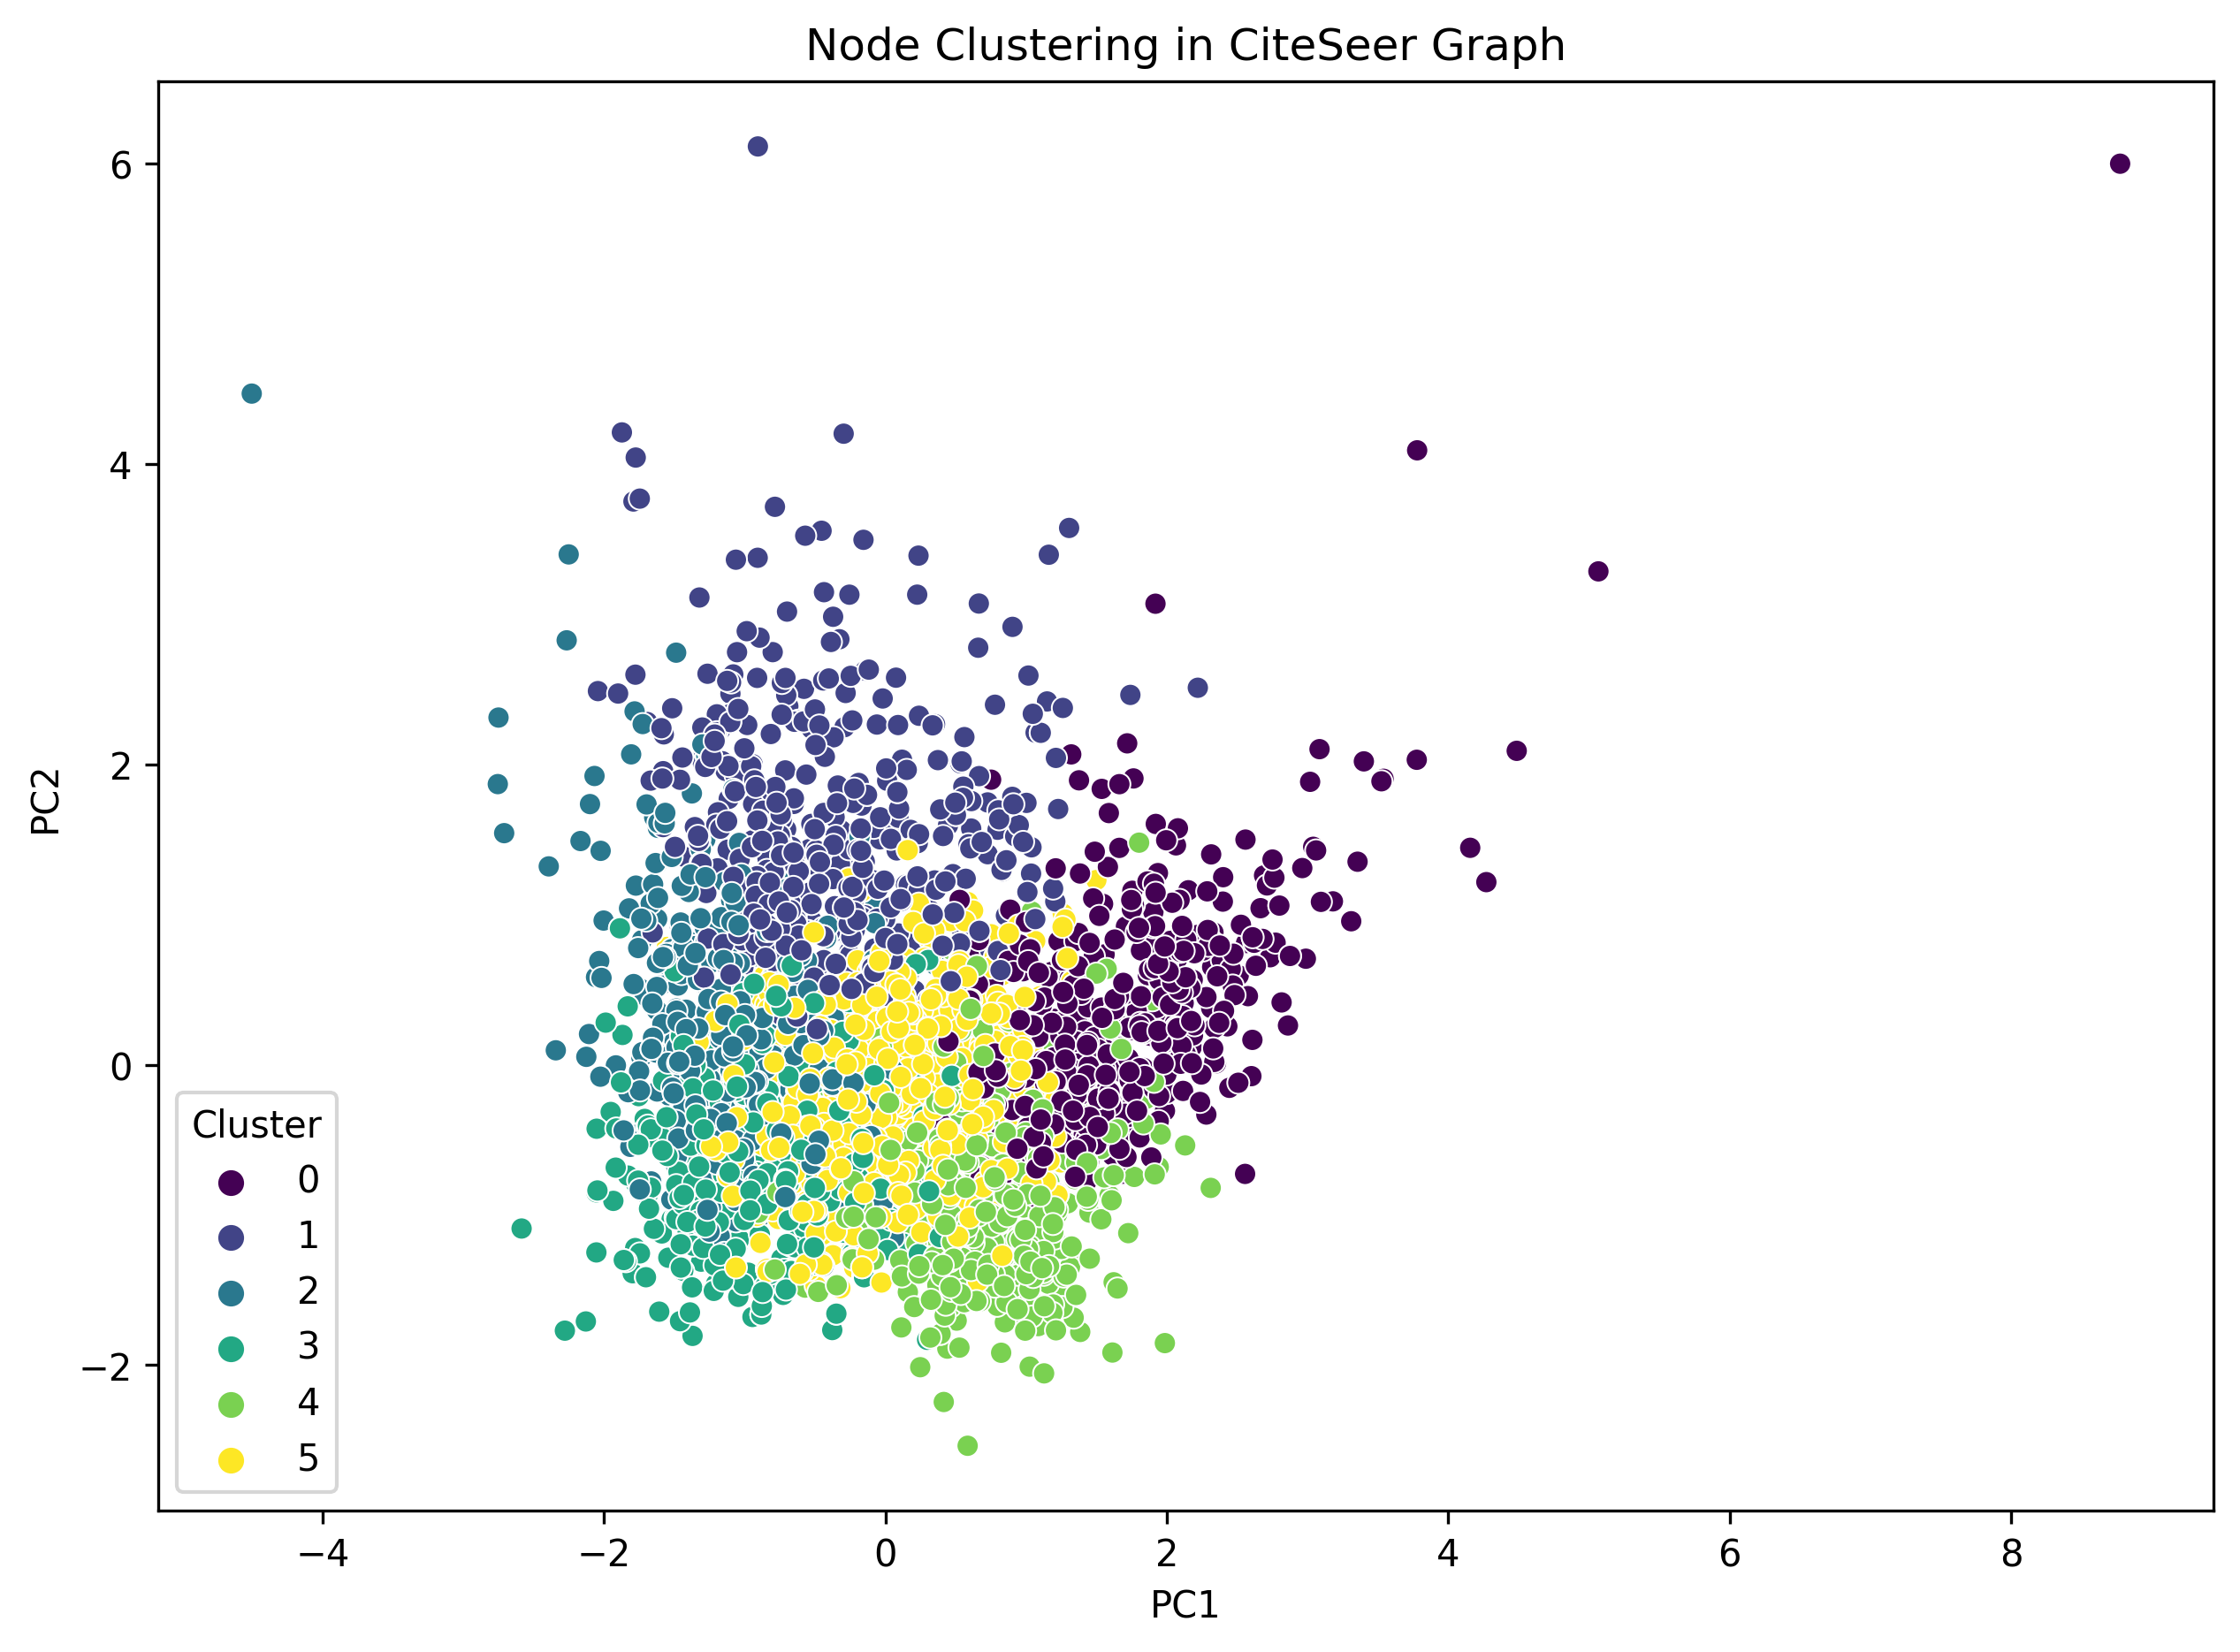

In [11]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
model.eval()
embeddings = model.conv1(data.x, data.edge_index).cpu().detach().numpy()# Apply K-Means Clustering
kmeans = KMeans(n_clusters=6, random_state=42)
clusters = kmeans.fit_predict(embeddings)
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(embeddings)
df = pd.DataFrame(reduced_embeddings, columns=['PC1', 'PC2'])
df['Cluster'] = clusters
plt.figure(figsize=(10, 7),dpi=300)
sns.scatterplot(data=df, x='PC1', y='PC2', hue='Cluster', palette="viridis")
plt.title("Node Clustering in CiteSeer Graph")
plt.savefig("Node Clustering in CiteSeer Graph.png", dpi=300)
plt.show()

In [50]:
import numpy as np
import networkx as nx
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from torch_geometric.datasets import Planetoid
from torch_geometric.utils import to_networkx
dataset = Planetoid(root='data', name='CiteSeer')
data = dataset[0]
G = to_networkx(data, to_undirected=True)
degree_centrality = nx.degree_centrality(G)
pagerank = nx.pagerank(G)
df = pd.DataFrame({
    "degree_centrality": [degree_centrality[i] for i in range(len(G))],
    "pagerank": [pagerank[i] for i in range(len(G))],
    "label": data.y.numpy()  # Target variable
})
X_train, X_test, y_train, y_test = train_test_split(
df.drop(columns=["label"]), df["label"], test_size=0.2, random_state=42)
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest Accuracy: {accuracy:.4f}")

Random Forest Accuracy: 0.3153


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1765: FutureWarning:

unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.



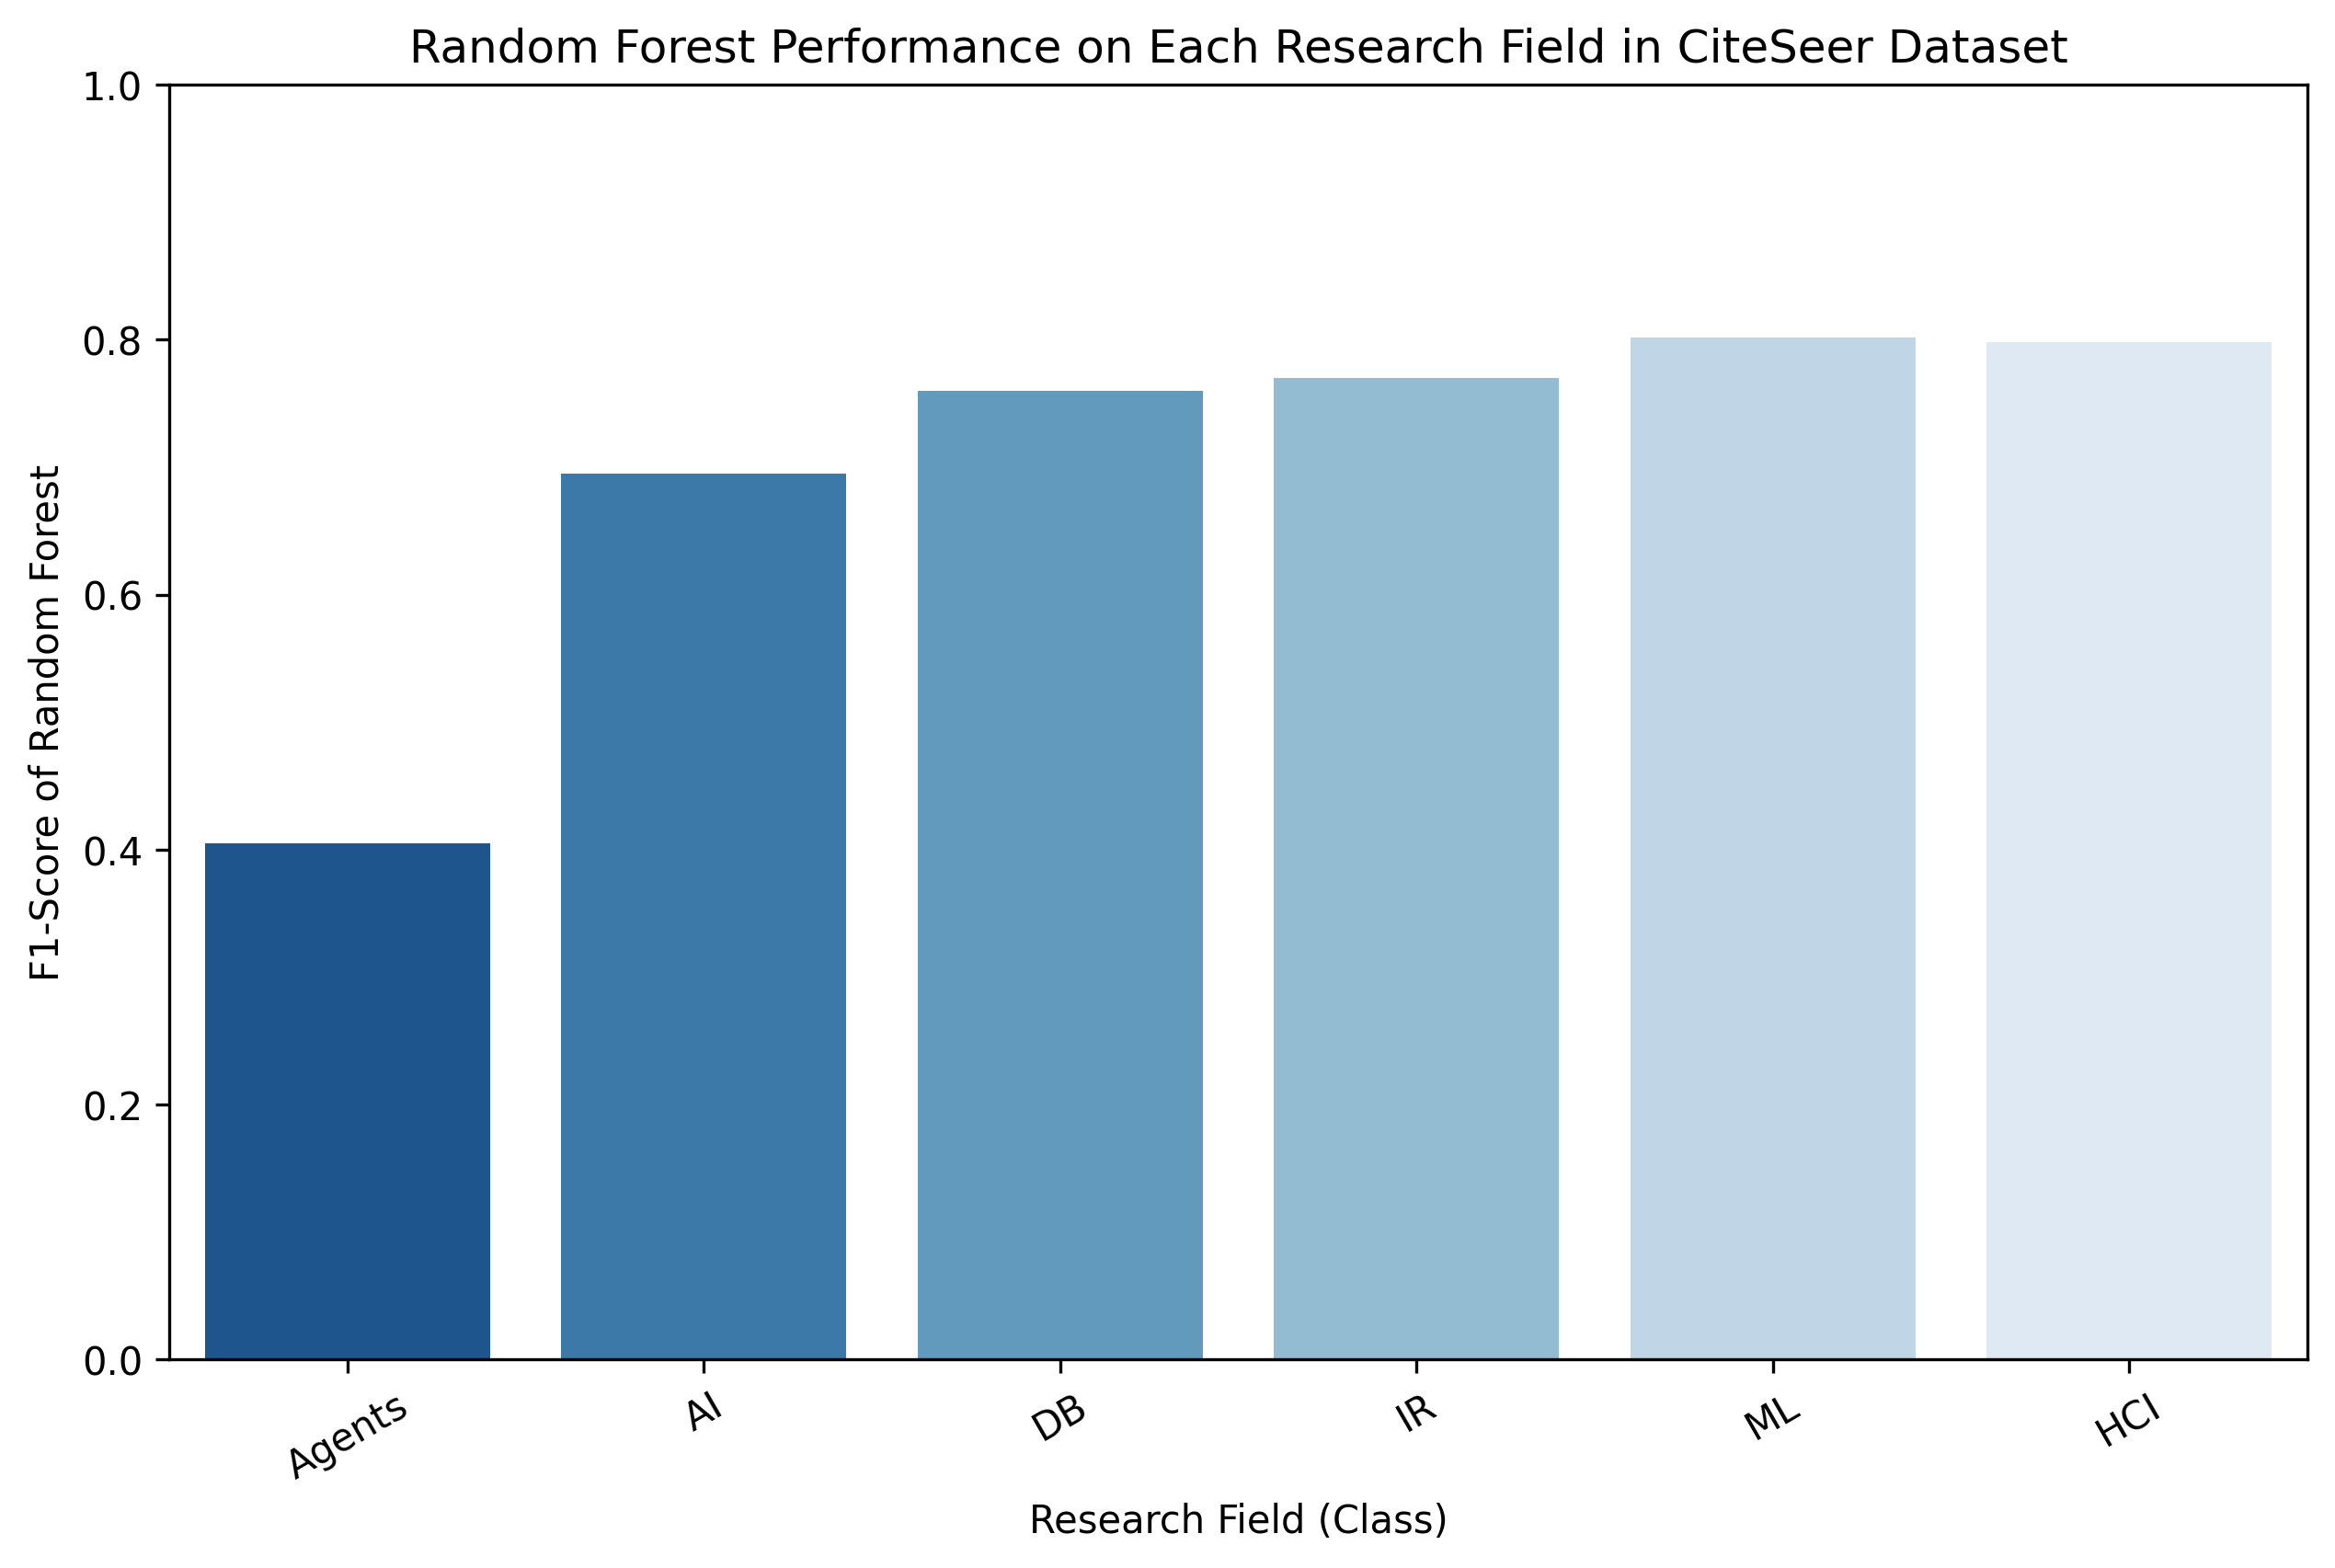

In [51]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from torch_geometric.datasets import Planetoid
from sklearn.model_selection import train_test_split
dataset = Planetoid(root='data', name='CiteSeer')
data = dataset[0]
X = data.x.cpu().numpy()  
y = data.y.cpu().numpy()  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
class_report = classification_report(y_test, y_pred, output_dict=True)
class_names = dataset.num_classes 
class_f1_scores = [class_report[str(i)]['f1-score'] for i in range(class_names)]
class_name_mapping = {0: "Agents",1: "AI",2: "DB",3: "IR",4: "ML",5: "HCI"}
plt.figure(figsize=(10, 6), dpi=300)
sns.barplot(x=list(class_name_mapping.values()), y=class_f1_scores, palette="Blues_r")
plt.xlabel("Research Field (Class)")
plt.ylabel("F1-Score of Random Forest")
plt.title("Random Forest Performance on Each Research Field in CiteSeer Dataset")
plt.ylim(0, 1)  
plt.xticks(rotation=30) 
plt.savefig("rf_performance_citeseer.png", dpi=300)
plt.show()